In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [2]:
import os

with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [3]:
# 약 10분정도 걸립니다.
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

In [4]:
print(len(tokenized))

71156


STEP 2. 추출된 결과로 embedding model 만들기

In [5]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. 
w2v = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  

w2v.most_similar(positive=['영화'])

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('작품', 0.9125556349754333),
 ('다큐멘터리', 0.8611237406730652),
 ('드라마', 0.8458557724952698),
 ('영화로', 0.8329638838768005),
 ('에마데딘', 0.8284255266189575),
 ('코미디', 0.8198772668838501),
 ('형식', 0.8072717785835266),
 ('인터뷰', 0.7911005020141602),
 ('주제', 0.789508581161499),
 ('실화', 0.78864985704422)]

In [6]:
w2v.most_similar(positive=['사랑'])

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('애정', 0.7284020781517029),
 ('첫사랑', 0.7209386825561523),
 ('연애', 0.7145191431045532),
 ('행복', 0.7085584998130798),
 ('왕징', 0.7084593772888184),
 ('이별', 0.7078344225883484),
 ('세츠코', 0.694256603717804),
 ('만남', 0.6923313736915588),
 ('고백', 0.691857635974884),
 ('토마슈', 0.6917510032653809)]

In [7]:
w2v.most_similar(positive=['친구'])

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('단짝', 0.7498497366905212),
 ('절친', 0.7275782227516174),
 ('여자친구', 0.6871090531349182),
 ('의붓남매', 0.6781598329544067),
 ('누나', 0.6557790637016296),
 ('오빠', 0.6547855138778687),
 ('강아지', 0.654627799987793),
 ('결혼식', 0.6463339924812317),
 ('알렉스', 0.6418023705482483),
 ('남자친구', 0.6383015513420105)]

STEP 3. target, attribute 단어 셋 만들기

In [8]:
#weat socre 구현

def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B#, c_a, c_b

def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

STEP 4. WEAT score 계산과 시각화

In [9]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [10]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [11]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [12]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

2

In [13]:
np.shape(svd_model.components_)

(2, 41082)

In [14]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('자신', 0.30425), ('그녀', 0.30159), ('시작', 0.256), ('위해', 0.25295), ('사람', 0.22759)]
Topic 2: [('영화제', 0.57245), ('국제', 0.42084), ('서울', 0.20131), ('애니메이션', 0.13612), ('작품', 0.09515)]


In [15]:
print(X.shape)

(2, 41082)


In [16]:
type(svd_model.components_)

numpy.ndarray

In [17]:
type(X)

scipy.sparse.csr.csr_matrix

In [22]:
from scipy.sparse import csr_matrix

X = csr_matrix(svd_model.components_)

In [23]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


In [24]:
m1 = X[0].tocoo()
m2 = X[1].tocoo()

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)
w2.sort(key=lambda x: x[1], reverse=True)

for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')
    

for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

자신, 그녀, 시작, 위해, 사람, 사랑, 영화제, 영화, 친구, 남자, 이야기, 국제, 가족, 사건, 대한, 여자, 아이, 아버지, 마을, 마음, 엄마, 모든, 세상, 시간, 남편, 서로, 다시, 아들, 다른, 소녀, 사실, 세계, 아내, 과연, 사이, 감독, 하나, 서울, 발견, 모습, 통해, 우리, 생각, 점점, 단편, 모두, 여행, 관계, 때문, 생활, 죽음, 순간, 가장, 작품, 기억, 한편, 비밀, 인생, 결혼, 마지막, 학교, 소년, 명의, 도시, 상황, 이제, 간다, 인간, 전쟁, 과거, 아빠, 이자, 경찰, 사고, 여성, 미국, 음악, 위기, 최고, 일상, 현실, 동안, 가지, 존재, 하루, 살인, 이후, 운명, 결심, 어머니, 계속, 처음, 동생, 지금, 한국, 준비, 감정, 애니메이션, 여인, 사회, 영화제, 국제, 서울, 애니메이션, 작품, 단편, 남편, 연출, 의도, 부문, 여성, 관계, 섹스, 생각, 부천, 페스티벌, 다큐, 영화, 독립, 경쟁, 이야기, 모습, 그것, 통해, 판타스틱, 환경, 부산, 주인공, 대한, 대해, 아시아나, 인간, 이미지, 인디애니페스트, 정사, 표현, 때문, 마사지, 청소년, 남자, 유혹, 소리, 영상, 가지, 공간, 다른, 공격, 여자, 조직, 회사, 노인, 다큐멘터리, 포럼, 임무, 비디오, 자신, 관객, 자기, 유부녀, 만화, 애니, 일행, 불륜, 에피소드, 부부, 괴물, 전주, 상황, 살해, 미장센, 장면, 경험, 언니, 현장, 또한, 상영, 개인, 방식, 여러, 사용, 손님, 친구, 사회, 방법, 아시아, 출장, 지역, 의식, 최강, 개발, 퀴어, 음모, 요원, 문제, 투쟁, 바로, 자위, 동물, 발견, 현대, 

TF-IDF의 가장 큰 특징이자 단점은 문서당 빈도수에 근거한다는 것이다. 이로인해 어떤 어휘가 중요한지 아닌지에 대한 정도는 정확하게 잡아낼 수 있지만 빈도만을 따지기 때문에 단어간 관계나 순서, 인과등을 반영하지 못하는 문제가 발생한다. 이를 위해 LSA를 사용해주었다.

In [25]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in w2v.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in w2v.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [26]:
print(target_art)

['그녀', '시작', '위해', '사람', '사랑', '가족', '사건', '아이', '아버지', '마을', '마음', '엄마', '모든', '세상', '시간']


LSA 미 도입시 추출된 목록

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']

In [27]:
print(target_gen)

['연출', '의도', '부문', '섹스', '부천', '페스티벌', '다큐', '독립', '경쟁', '그것', '판타스틱', '환경', '부산', '주인공', '대해']


LSA 미도입시 추출된 목록

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']

In [28]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [29]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [30]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [31]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in w2v:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  del sys.path[0]


사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 시작, 위해, 사람, 살인, 남자, 

4. embedding model과 단어 셋으로 WEAT score 구해보기

In [32]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [33]:
A = np.array([w2v.wv[word] for word in target_art])
B = np.array([w2v.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = np.array([w2v.wv[word] for word in attributes[i]])
        Y = np.array([w2v.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

matrix를 채워보았습니다.
WEAT score 값이 2와 -2에 가까운 수치들을 보고, 과연 우리의 직관과 비슷한지 살펴볼까요?

In [34]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] > 1.1 or matrix[i][j] < -1.1:
            print(genre_name[i], genre_name[j],matrix[i][j])

SF 공포(호러) -1.14469
SF 미스터리 -1.2951704
SF 스릴러 -1.1675888
공연 미스터리 -1.1614219
공포(호러) 기타 1.1294048
공포(호러) 다큐멘터리 1.3058386
공포(호러) 뮤지컬 1.1301558
공포(호러) 전쟁 1.218201
기타 미스터리 -1.1934501
기타 스릴러 -1.1337123
다큐멘터리 멜로로맨스 -1.2524374
다큐멘터리 미스터리 -1.3666399
다큐멘터리 범죄 -1.1517216
다큐멘터리 스릴러 -1.3120037
다큐멘터리 액션 -1.1717925
멜로로맨스 전쟁 1.1200836
뮤지컬 미스터리 -1.1887666
뮤지컬 스릴러 -1.133756
미스터리 전쟁 1.3286245
스릴러 전쟁 1.2334088


<AxesSubplot:>

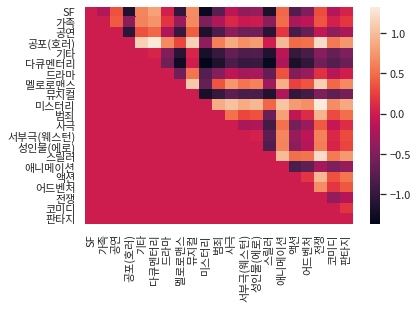

In [35]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font="Noto Sans CJK JP")

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name)
ax

In [36]:
len(matrix)

21